# Week 6. Optimization. Programming Task

### For grading

In [213]:
#DO NOT CHANGE
import grading
import grading_utils

In [214]:
#DO NOT CHANGE
grader = grading.Grader(assignment_key="BiQjKqu3RIyxwEW4WigmgA", 
                        all_parts=["C2ep5", "AVd3G", "Dkq1F", "OUwhX", "vjKMj", "uWwHK"])

In [215]:
# token expires every 30 min
COURSERA_TOKEN = '9DM8rib4t86gVFQy'
COURSERA_EMAIL = 'svafanasev@gmail.com'

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

**To submit your answers you will need to copy your token from next task ‘Programming: Final project’.**

**NOTE: you should write an optimal code: try avoiding cycles and use `numpy` instead! Optimality of your code will be graded out of 2 points**

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [216]:
import numpy as np
import pandas as pd

### Task 1. Reading 

In [217]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
5,2015-04-24,4.0,2.25,2860,11545,1.0,False,4,8,1430,1430,1966,0,98005,47.588001,-122.167999
6,2014-11-20,4.0,3.00,2090,7500,1.0,False,3,7,1370,720,1986,0,98056,47.488800,-122.181999
7,2015-04-23,4.0,3.75,3450,4940,2.0,False,3,10,2570,880,2006,0,98103,47.692001,-122.337997
8,2014-11-19,3.0,3.00,3490,4500,2.5,False,3,9,3170,320,1924,0,98102,47.639400,-122.320999
9,2014-09-15,3.0,1.75,1300,2446,1.0,False,3,8,880,420,1961,0,98122,47.607101,-122.285004


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [218]:
!pip install seaborn

You are using pip version 9.0.3, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

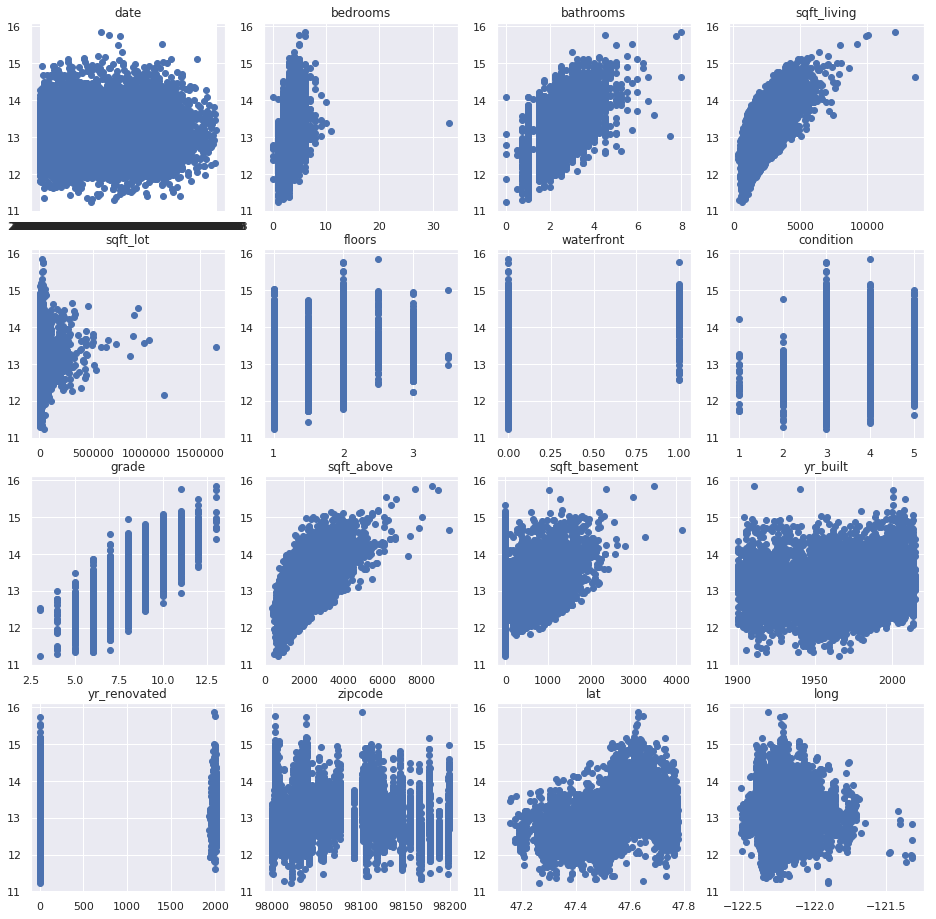

In [220]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [221]:
#your code goes here
X = datX[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
          'grade', 'sqft_above', 'sqft_basement', 'long', 'lat']].values
N = X.shape[0]
m = X.shape[1]

print (f'N: {N}', f'm: {m}', sep='\n')

N: 15000
m: 10


Run the following cells to automatically check results of your code:

In [148]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("C2ep5", grading_utils.test_reader(X, N, m))

In [149]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$ function
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [222]:
def loss(w, X, y):
    #your code goes here
    X_concat = np.concatenate((np.ones(X.shape[0])[:,None], X), axis=1)
    Y_predict = np.matmul(X_concat, w)
    N = X.shape[0]
    loss_matrix = np.power(y - Y_predict, 2)
    lossValue = sum(loss_matrix) / N
  
    return lossValue

Run the following cells to automatically check results of your code.

In [151]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("AVd3G", grading_utils.test_loss(loss, X, datY))

In [152]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ (1 point)
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.

The partial derivative of the loss function by $w_k$ has the form:

$\frac{\partial Loss}{\partial w_k}$ = $\frac{2}{N}$ $\sum\limits_{i=1}^N ( \sum\limits_{j=1}^m w_j\cdot x_{ij} + w_0 - y_{i})\cdot x_{ik}$


The partial derivative of the loss function by $w_0$ has the form:
 
$\frac{\partial Loss}{\partial w_0}$ = $\frac{2}{N}$ $\sum\limits_{i=1}^N (\sum\limits_{j=1}^m w_j\cdot x_{ij} + w_0 - y_{i})$
 
because first colums in the matrix X is columns of ones: $x_0$ = $(x_{10} ... x_{N0})$    
  

In matrix form, the loss function has the form:
 
$\nabla_w Loss$ = $\frac{2}{N}$ $X^{T}(X w - y)$ 




### Task 4. Write a function to compute the gradient of the Loss function in the given point
Please, keep the signature of the function and enter the code only under `your code goes here`. 

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!


In [223]:
def grad(w_k, X, y):
    #your code goes here
    X_concat = np.concatenate((np.ones(X.shape[0])[:,None], X), axis=1)
    Y_predict = np.matmul(X_concat, w_k)
    N = X.shape[0]
    lossGradient = 2 * np.matmul(X_concat.T, (Y_predict - y)) / N
    
    return lossGradient

Run the following cells to automatically check your function. 

In [154]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("Dkq1F", grading_utils.test_grad(grad, X, datY))

In [155]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


### Task 5. Write gradient descent (2 points)
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k}
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [224]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses = []
    weights = [w_init]
    
    curiter = 0
    w_k = weights[-1]
    grad_lenght = eps + 666
    
    while (curiter < maxiter) and (grad_lenght > eps):
        w_k -= alpha * grad(w_k, X, y)
        lossValue_k = loss(w_k, X, y)
        curiter += 1
        grad_lenght = sum(np.power(grad(w_k, X, y), 2)) ** (0.5)
        
        weights.append(w_k)
        losses.append(lossValue_k)
        
    return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

In [157]:
# Experiment 1: alpha1 = 0.0001
alpha1 = 0.0001
w_init = np.array([0.01] * (X.shape[1] + 1))

weights_exp1, losses_exp1 = gradDescent(w_init, alpha1, X, datY, maxiter=500, eps=1e-2)


In [158]:
# Experiment 2: alpha2 = 0.00000001

alpha2 = 0.00000001
w_init = np.array([0.01] * (X.shape[1] + 1))

weights_exp2, losses_exp2 = gradDescent(w_init, alpha2, X, datY, maxiter=500, eps=1e-2)

In [159]:
# Experiment 3: alpha3 = 0.0000000001

alpha3 = 0.0000000001
w_init = np.array([0.01] * (X.shape[1] + 1))

weights_exp3, losses_exp3 = gradDescent(w_init, alpha3, X, datY, maxiter=500, eps=1e-2)

Experiment 1:
alpha =  0.0001
Last itaration: 93
Losses of last iteration: nan
Weights of last iteration:
 [ -8.08740188e+297  -2.91303701e+298  -1.92423293e+298              -inf
  -1.29308398e+298  -2.73449742e+298  -6.52279524e+298              -inf
              -inf   9.88241951e+299  -3.84657932e+299]


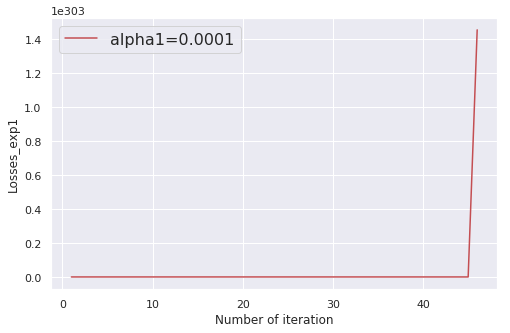

Experiment 2:
alpha =  1e-08
Last itaration: 500
Losses of last iteration: 25.5401775947
Weights of last iteration:
 [  1.00170834e-02   1.00306139e-02   1.00075483e-02  -3.54227563e-05
   1.00168945e-02   1.00599738e-02   1.00881539e-02   5.62659599e-03
   4.33798126e-03   7.91053342e-03   1.08124027e-02]


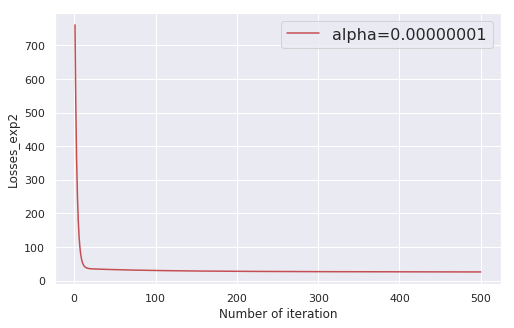

Experiment 3:
alpha =  1e-10
Last itaration: 500
Losses of last iteration: 210.075720259
Weights of last iteration:
 [ 0.00999823  0.00999327  0.00999543  0.00502904  0.0099971   0.009994
  0.0099852   0.0058419   0.00918715  0.01021673  0.00991563]


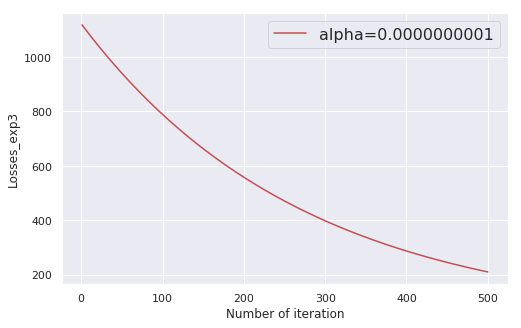

In [258]:
# **********  PLOTS  **********
# Experiment 1: alpha1 = 0.0001

max_iter_exp1 = []
for i in range(len(losses_exp1)):
    max_iter_exp1.append(i+1)
    
    
print('Experiment 1:')
print('alpha = ', alpha1)
print('Last itaration:', i+1)
print('Losses of last iteration:', losses_exp1[i])
print('Weights of last iteration:\n', weights_exp1[i])


plt.figure(figsize=(8,5))
plt.plot(max_iter_exp1, losses_exp1, 'r', label = 'alpha1=0.0001')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp1')
plt.legend(loc="best", fontsize = 16)
plt.show()


# ***********************************
# Experiment 2: alpha2 = 0.00000001

max_iter_exp2 = []
for j in range(len(losses_exp2)):
    max_iter_exp2.append(j+1)
    
print('Experiment 2:')
print('alpha = ', alpha2)
print('Last itaration:', j+1)
print('Losses of last iteration:', losses_exp2[j])
print('Weights of last iteration:\n', weights_exp2[j])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp2, losses_exp2, 'r', label = 'alpha=0.00000001')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp2')
plt.legend(loc="best", fontsize = 16)
plt.show()


# ***********************************
# Experiment 3: alpha3 = 0.0000000001

max_iter_exp3 = []
for k in range(len(losses_exp3)):
    max_iter_exp3.append(k+1)
    
print('Experiment 3:')
print('alpha = ', alpha3)
print('Last itaration:', k+1)
print('Losses of last iteration:', losses_exp3[k])
print('Weights of last iteration:\n', weights_exp3[k])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp3, losses_exp3, 'r', label = 'alpha=0.0000000001')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp3')
plt.legend(loc="best", fontsize = 16)
plt.show()


Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [227]:
### your code goes here
import random

indexes = []
current_iter = 0
X_concat = np.concatenate((np.ones(X.shape[0])[:,None], X), axis=1)
weights = weights_exp2[len(weights_exp2)-1] # weights from the last iteration of gradient descent

print('Experiment 2: alpha2 = 0.00000001', '\n')

while current_iter < 10:
    index = random.randint(0, X_concat.shape[0] - 1)  #choose a random house index from the general list
    
    if index not in indexes: #this is checking that the index was not used earlier
        y_predict = np.sum(X_concat[index] * weights)
        print(f'y_predict[{index}] =', round(y_predict, 1),
              '     \t',
              f'y_target[{index}] =', round(datY[index], 1))
        current_iter += 1
    
    indexes.append(index)


Experiment 2: alpha2 = 0.00000001 

y_predict[6284] = 7.5      	 y_target[6284] = 12.8
y_predict[9676] = 7.8      	 y_target[9676] = 12.8
y_predict[11040] = 9.2      	 y_target[11040] = 12.9
y_predict[13851] = 12.4      	 y_target[13851] = 12.8
y_predict[11479] = 6.3      	 y_target[11479] = 12.9
y_predict[9193] = 10.3      	 y_target[9193] = 13.2
y_predict[6479] = 13.2      	 y_target[6479] = 13.4
y_predict[14463] = 9.9      	 y_target[14463] = 12.3
y_predict[2338] = 17.5      	 y_target[2338] = 13.7
y_predict[12609] = 16.7      	 y_target[12609] = 13.6


Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (**1 point**)

#### Answer:
The predicted price for 10 random houses differs from the true prices. This is because gradient methods are sensitive to the scale of features. If the norm of the vector $||x||$ takes large values, and the loss function has horizontal asymptotes, then the iterative process may be paralyzed. To solve this problem, use feature normalization.

### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [228]:
def norm(X):
    # your code goes here   
    return (X - X.mean(axis = 0)) / X.std(axis = 0)

Run the following cell to automatically check your function. 

In [163]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("OUwhX", grading_utils.test_norm(norm(X)))

In [164]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


### Task 7. And again (2 points)

Repeat gradient descent experiments for different $\alpha$s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

In [229]:
X_norm = norm(X)

In [184]:
# Experiment 2.1: alpha21 = 0.1

alpha21 = 0.1
w_init = np.array([0.01] * (X_norm.shape[1] + 1))

weights_exp21, losses_exp21 = gradDescent(w_init, alpha21, X_norm, datY, maxiter=500, eps=1e-2)

In [185]:
# Experiment 2.2: alpha22 = 0.05
alpha22 = 0.05
w_init = np.array([0.01] * (X_norm.shape[1] + 1))

weights_exp22, losses_exp22 = gradDescent(w_init, alpha22, X_norm, datY, maxiter=500, eps=1e-2)

In [186]:
# Experiment 2.3: alpha23 = 0.01

alpha23 = 0.01
w_init = np.array([0.01] * (X_norm.shape[1] + 1))

weights_exp23, losses_exp23 = gradDescent(w_init, alpha23, X_norm, datY, maxiter=500, eps=1e-2)

In [187]:
# Experiment 2.4: alpha24 = 0.005

alpha24 = 0.005
w_init = np.array([0.01] * (X_norm.shape[1] + 1))

weights_exp24, losses_exp24 = gradDescent(w_init, alpha24, X_norm, datY, maxiter=500, eps=1e-2)

In [188]:
# Experiment 2.5: alpha25 = 0.001

alpha25 = 0.001
w_init = np.array([0.01] * (X_norm.shape[1] + 1))

weights_exp25, losses_exp25 = gradDescent(w_init, alpha25, X_norm, datY, maxiter=500, eps=1e-2)

Experiment 2.1:
alpha =  0.1
Last itaration: 36
Losses of last iteration: 0.0770571129364
Weights of last iteration:
 [  1.30447236e+01  -1.95213445e-02   1.64147881e-02   1.08687476e-01
   1.00260372e-02   6.69907087e-02   1.89779939e-01   9.37980851e-02
   5.81439973e-02  -2.56207673e-02   1.97815298e-01]


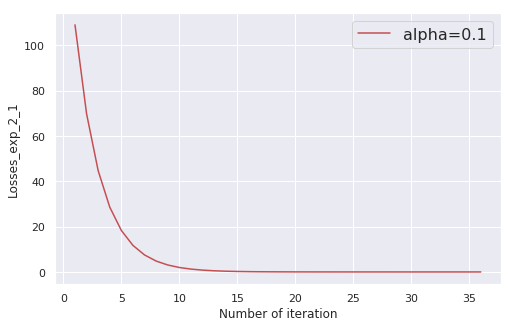

Experiment 2.2:
alpha =  0.05
Last itaration: 76
Losses of last iteration: 0.0770544472004
Weights of last iteration:
 [  1.30446132e+01  -1.93791765e-02   1.59929104e-02   1.08587844e-01
   1.00381126e-02   6.69859965e-02   1.90333328e-01   9.36732118e-02
   5.81711564e-02  -2.56075759e-02   1.97746601e-01]


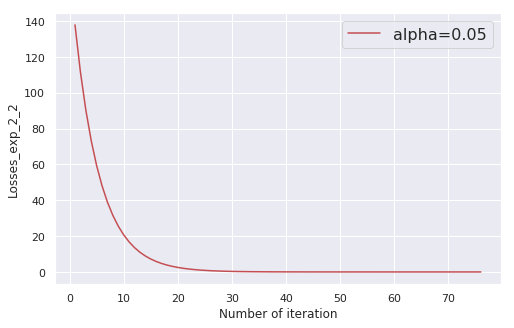

Experiment 2.3:
alpha =  0.01
Last itaration: 396
Losses of last iteration: 0.0770522694895
Weights of last iteration:
 [  1.30445821e+01  -1.92745699e-02   1.56866792e-02   1.08513159e-01
   1.00503329e-02   6.69835541e-02   1.90736760e-01   9.35791126e-02
   5.81924425e-02  -2.55957608e-02   1.97697312e-01]


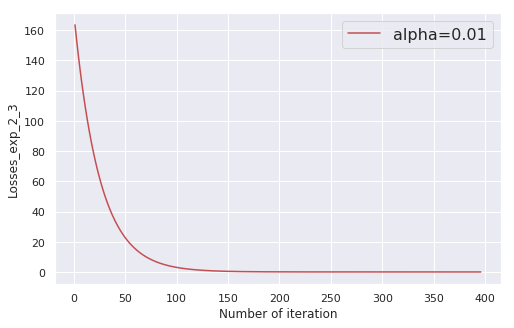

Experiment 2.4:
alpha =  0.02
Last itaration: 181
Losses of last iteration: 0.0813512750364
Weights of last iteration:
 [  1.30652469e+01  -1.97347688e-02   1.41950078e-02   1.09898850e-01
   8.92904788e-03   6.69362801e-02   1.90620311e-01   9.47452543e-02
   5.88881664e-02  -2.74141055e-02   1.99854896e-01]


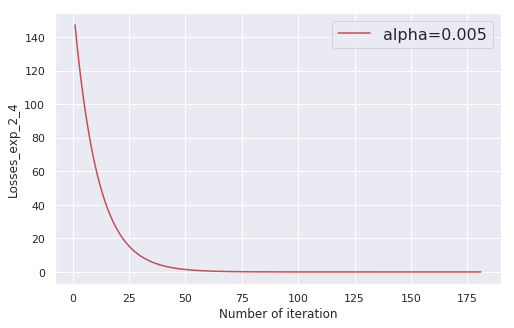

Experiment 2.5:
alpha =  0.001
Last itaration: 500
Losses of last iteration: 23.0496138396
Weights of last iteration:
 [ 8.2569923   0.01793426  0.05492941  0.0969924   0.02987402  0.04110155
  0.12304156  0.07975483  0.06017559 -0.01263611  0.13780206]


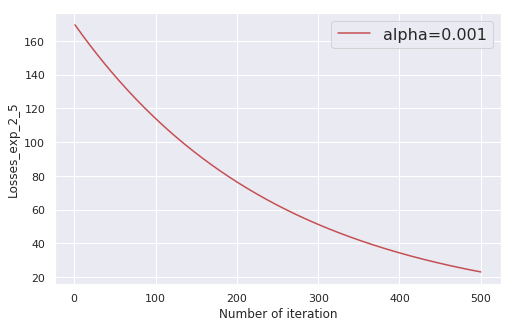

In [259]:
# **********  PLOTS  **********
# Experiment 2.1: alpha21 = 0.1

max_iter_exp21 = []
for i in range(len(losses_exp21)):
    max_iter_exp21.append(i+1)
    
    
print('Experiment 2.1:')
print('alpha = ', alpha21)
print('Last itaration:', i+1)
print('Losses of last iteration:', losses_exp21[i])
print('Weights of last iteration:\n', weights_exp21[i])


plt.figure(figsize=(8,5))
plt.plot(max_iter_exp21, losses_exp21, 'r', label = 'alpha=0.1')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_2_1')
plt.legend(loc="best", fontsize = 16)
plt.show()


# ***********************************
# Experiment 2.2: alpha22 = 0.05

max_iter_exp22 = []
for i in range(len(losses_exp22)):
    max_iter_exp22.append(i+1)
    
    
print('Experiment 2.2:')
print('alpha = ', alpha22)
print('Last itaration:', i+1)
print('Losses of last iteration:', losses_exp22[i])
print('Weights of last iteration:\n', weights_exp22[i])


plt.figure(figsize=(8,5))
plt.plot(max_iter_exp22, losses_exp22, 'r', label = 'alpha=0.05')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_2_2')
plt.legend(loc="best", fontsize = 16)
plt.show()


# ***********************************
# Experiment 2.3: alpha23 = 0.01

max_iter_exp23 = []
for j in range(len(losses_exp23)):
    max_iter_exp23.append(j+1)
    
print('Experiment 2.3:')
print('alpha = ', alpha23)
print('Last itaration:', j+1)
print('Losses of last iteration:', losses_exp23[j])
print('Weights of last iteration:\n', weights_exp23[j])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp23, losses_exp23, 'r', label = 'alpha=0.01')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_2_3')
plt.legend(loc="best", fontsize = 16)
plt.show()


# ***********************************
# Experiment 2.4: alpha24 = 0.005

max_iter_exp24 = []
for j in range(len(losses_exp24)):
    max_iter_exp24.append(j+1)
    
print('Experiment 2.4:')
print('alpha = ', alpha24)
print('Last itaration:', j+1)
print('Losses of last iteration:', losses_exp24[j])
print('Weights of last iteration:\n', weights_exp24[j])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp24, losses_exp24, 'r', label = 'alpha=0.005')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_2_4')
plt.legend(loc="best", fontsize = 16)
plt.show()


# ***********************************
# Experiment 2.5: alpha25 = 0.001

max_iter_exp25 = []
for k in range(len(losses_exp25)):
    max_iter_exp25.append(k+1)
    
print('Experiment 2.5:')
print('alpha = ', alpha25)
print('Last itaration:', k+1)
print('Losses of last iteration:', losses_exp25[k])
print('Weights of last iteration:\n', weights_exp25[k])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp25, losses_exp25, 'r', label = 'alpha=0.001')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_2_5')
plt.legend(loc="best", fontsize = 16)
plt.show()


### Task 8. Better pay twice (2 points)

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [246]:
"""
New Loss function
"""
def new_loss(w, X, y, a, b):
    #your code goes here
    X = norm(X)
    X_concat = np.concatenate((np.ones(X.shape[0])[:,None], X), axis=1)
    Y_predict = np.matmul(X_concat, w)
    N = X.shape[0]
    
    loss_matrix = np.where((y - Y_predict) < 0, a * np.power(y - Y_predict, 2), 
                          b * np.power(y - Y_predict, 2))
    
    lossValue = sum(loss_matrix) / N

    return lossValue


In [247]:
"""
New Gradient function
"""
def new_grad(w_k, X, y, a, b):
    #your code goes here
    X = norm(X)
    X_concat = np.concatenate((np.ones(X.shape[0])[:,None], X), axis=1)
    Y_predict = np.matmul(X_concat, w_k)
    Y_new_delta = np.where((Y_predict - y) < 0, a * (Y_predict - y),
                           b * (Y_predict - y))
    N = X.shape[0]
    lossGradient = 2 * np.matmul(X_concat.T, Y_new_delta) / N    

    return lossGradient


Run the following cells to automatically check results of your code.

In [202]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("vjKMj", grading_utils.test_new_loss(new_loss, X, datY))

In [203]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Run the following cells to automatically check results of your code.

In [210]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("uWwHK", grading_utils.test_new_grad(new_grad, X, datY))

In [211]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

In [248]:
# def new_grad(w_k, X, y, a, b):
# def new_loss(w, X, y, a, b):

"""
New Gradient Descent function
"""

def new_gradDescent(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2):
    losses = []
    weights = [w_init]
    
    curiter = 0
    w_k = weights[-1]
    grad_lenght = eps + 666
    
    #your code goes here
    while (curiter < maxiter) and (grad_lenght > eps):
        w_k -= alpha * new_grad(w_k, X, y, a, b)
        lossValue_k = new_loss(w_k, X, y, a, b)
        curiter += 1
        grad_lenght = sum(np.power(new_grad(w_k, X, y, a, b), 2)) ** (0.5)
        
        weights.append(w_k)
        losses.append(lossValue_k)
        
    return weights, losses

In [249]:
# ************  EXPERIMENTS ************

# Experiment 3.1: 
alpha31 = 0.02
a1 = 1.15
b1 = 0.95
w_init = np.array([0.01] * (X_norm.shape[1] + 1))
weights_exp31, losses_exp31 = new_gradDescent(w_init, alpha31, X_norm, datY, a1, b1, maxiter=500, eps=1e-2)


In [250]:
# Experiment 3.2: 
alpha32 = 0.02
a2 = 0.95
b2 = 1.15
w_init = np.array([0.01] * (X_norm.shape[1] + 1))
weights_exp32, losses_exp32 = new_gradDescent(w_init, alpha32, X_norm, datY, a2, b2, maxiter=500, eps=1e-2)


In [251]:
# Experiment 3.3: 
alpha33 = 0.01
a3 = 1.15
b3 = 0.95
w_init = np.array([0.01] * (X_norm.shape[1] + 1))
weights_exp33, losses_exp33 = new_gradDescent(w_init, alpha33, X_norm, datY, a3, b3, maxiter=500, eps=1e-2)


In [252]:
# Experiment 3.4: 
alpha34 = 0.01
a4 = 0.95
b4 = 1.15
w_init = np.array([0.01] * (X_norm.shape[1] + 1))
weights_exp34, losses_exp34 = new_gradDescent(w_init, alpha34, X_norm, datY, a4, b4, maxiter=500, eps=1e-2)


In [253]:
# Experiment 3.5: 
alpha35 = 0.02
a5 = 20
b5 = 15
w_init = np.array([0.01] * (X_norm.shape[1] + 1))
weights_exp35, losses_exp35 = new_gradDescent(w_init, alpha35, X_norm, datY, a5, b5, maxiter=500, eps=1e-2)


In [254]:
# Experiment 3.6: 
alpha36 = 0.02
a6 = 15
b6 = 20
w_init = np.array([0.01] * (X_norm.shape[1] + 1))
weights_exp36, losses_exp36 = new_gradDescent(w_init, alpha36, X_norm, datY, a6, b6, maxiter=500, eps=1e-2)


Experiment 3.1:
alpha = 0.02
a = 1.15
b = 0.95
Last itaration: 181
Losses of last iteration: 0.0813512750364
Weights of last iteration:
 [  1.30652469e+01  -1.97347688e-02   1.41950078e-02   1.09898850e-01
   8.92904788e-03   6.69362801e-02   1.90620311e-01   9.47452543e-02
   5.88881664e-02  -2.74141055e-02   1.99854896e-01]


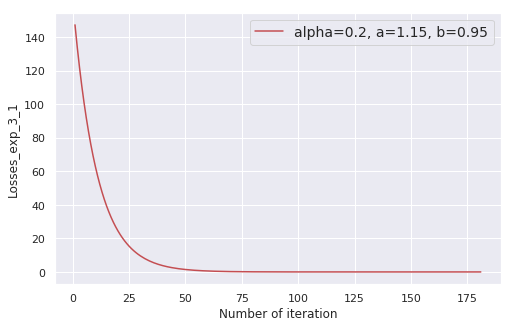

Experiment 3.2:
alpha = 0.02
a = 0.95
b = 1.15
Last itaration: 197
Losses of last iteration: 0.083155323529
Weights of last iteration:
 [  1.30244646e+01  -1.87440761e-02   1.71534171e-02   1.07166549e-01
   1.10051987e-02   6.69892013e-02   1.90857239e-01   9.25072900e-02
   5.74007751e-02  -2.38051136e-02   1.95522264e-01]


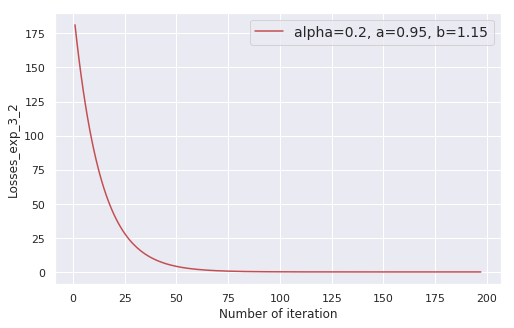

Experiment 3.3:
alpha = 0.01
a = 1.15
b = 0.95
Last itaration: 366
Losses of last iteration: 0.0813499757315
Weights of last iteration:
 [  1.30652366e+01  -1.97086888e-02   1.41119999e-02   1.09884960e-01
   8.93193504e-03   6.69345702e-02   1.90717168e-01   9.47271173e-02
   5.88933221e-02  -2.74125495e-02   1.99841840e-01]


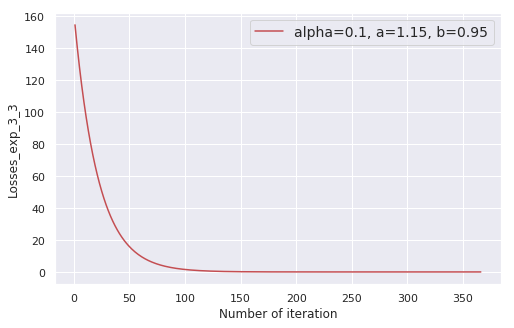

Experiment 3.4:
alpha = 0.01
a = 0.95
b = 1.15
Last itaration: 398
Losses of last iteration: 0.083154843384
Weights of last iteration:
 [  1.30244627e+01  -1.87170546e-02   1.70842350e-02   1.07142292e-01
   1.10093696e-02   6.69895780e-02   1.90961735e-01   9.24772398e-02
   5.74067249e-02  -2.37999355e-02   1.95510718e-01]


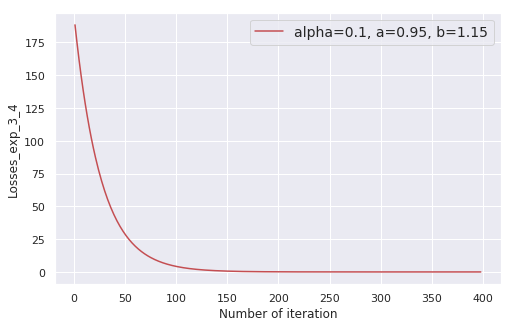

Experiment 3.5:
alpha = 0.02
a = 20
b = 15
Last itaration: 500
Losses of last iteration: 1.55299225519e+264
Weights of last iteration:
 [  1.58331150e+130  -4.79484168e+130  -6.56946908e+130  -6.62812061e+130
  -4.46174661e+130   1.35411069e+130  -6.17355156e+130  -6.37524895e+130
  -1.82792183e+130  -2.55381082e+130  -3.58015061e+129]


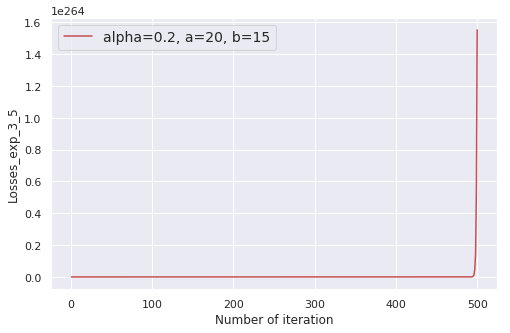

Experiment 3.6:
alpha = 0.02
a = 15
b = 20
Last itaration: 500
Losses of last iteration: 1.16805898274e+263
Weights of last iteration:
 [ -3.96742165e+129  -1.18117209e+130  -1.65339400e+130  -1.87338579e+130
  -1.08200968e+130   3.61450711e+129  -1.66559222e+130  -1.84404417e+130
  -4.37389405e+129  -6.36345012e+129  -1.09321156e+129]


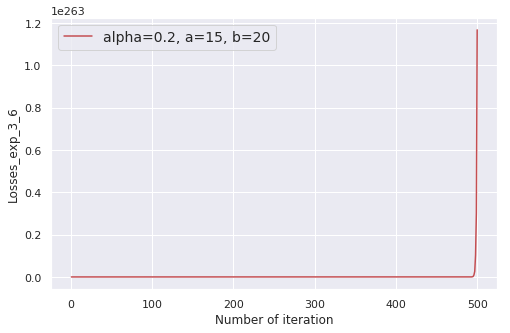

In [257]:
# **********  PLOTS  **********

# Experiment 3.1:

max_iter_exp31 = []
for i in range(len(losses_exp31)):
    max_iter_exp31.append(i+1)

print('Experiment 3.1:')
print('alpha =', alpha31)
print('a =', a1)
print('b =', b1)
print('Last itaration:', i+1)
print('Losses of last iteration:', losses_exp31[i])
print('Weights of last iteration:\n', weights_exp31[i])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp31, losses_exp31, 'r', label = 'alpha=0.2, a=1.15, b=0.95')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_3_1')
plt.legend(loc="best", fontsize = 14)
plt.show()


# Experiment 3.2:

max_iter_exp32 = []
for i in range(len(losses_exp32)):
    max_iter_exp32.append(i+1)

print('Experiment 3.2:')
print('alpha =', alpha32)
print('a =', a2)
print('b =', b2)
print('Last itaration:', i+1)
print('Losses of last iteration:', losses_exp32[i])
print('Weights of last iteration:\n', weights_exp32[i])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp32, losses_exp32, 'r', label = 'alpha=0.2, a=0.95, b=1.15')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_3_2')
plt.legend(loc="best", fontsize = 14)
plt.show()


# Experiment 3.3:

max_iter_exp33 = []
for i in range(len(losses_exp33)):
    max_iter_exp33.append(i+1)

print('Experiment 3.3:')
print('alpha =', alpha33)
print('a =', a3)
print('b =', b3)
print('Last itaration:', i+1)
print('Losses of last iteration:', losses_exp33[i])
print('Weights of last iteration:\n', weights_exp33[i])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp33, losses_exp33, 'r', label = 'alpha=0.1, a=1.15, b=0.95')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_3_3')
plt.legend(loc="best", fontsize = 14)
plt.show()


# Experiment 3.4:

max_iter_exp34 = []
for i in range(len(losses_exp34)):
    max_iter_exp34.append(i+1)

print('Experiment 3.4:')
print('alpha =', alpha34)
print('a =', a4)
print('b =', b4)
print('Last itaration:', i+1)
print('Losses of last iteration:', losses_exp34[i])
print('Weights of last iteration:\n', weights_exp34[i])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp34, losses_exp34, 'r', label = 'alpha=0.1, a=0.95, b=1.15')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_3_4')
plt.legend(loc="best", fontsize = 14)
plt.show()


# Experiment 3.5:

max_iter_exp35 = []
for i in range(len(losses_exp35)):
    max_iter_exp35.append(i+1)

print('Experiment 3.5:')
print('alpha =', alpha35)
print('a =', a5)
print('b =', b5)
print('Last itaration:', i+1)
print('Losses of last iteration:', losses_exp35[i])
print('Weights of last iteration:\n', weights_exp35[i])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp35, losses_exp35, 'r', label = 'alpha=0.2, a=20, b=15')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_3_5')
plt.legend(loc="best", fontsize = 14)
plt.show()


# Experiment 3.6:

max_iter_exp36 = []
for i in range(len(losses_exp36)):
    max_iter_exp36.append(i+1)

print('Experiment 3.6:')
print('alpha =', alpha36)
print('a =', a6)
print('b =', b6)
print('Last itaration:', i+1)
print('Losses of last iteration:', losses_exp36[i])
print('Weights of last iteration:\n', weights_exp36[i])

plt.figure(figsize=(8,5))
plt.plot(max_iter_exp36, losses_exp36, 'r', label = 'alpha=0.2, a=15, b=20')
plt.xlabel('Number of iteration')
plt.ylabel('Losses_exp_3_6')
plt.legend(loc="best", fontsize = 14)
plt.show()


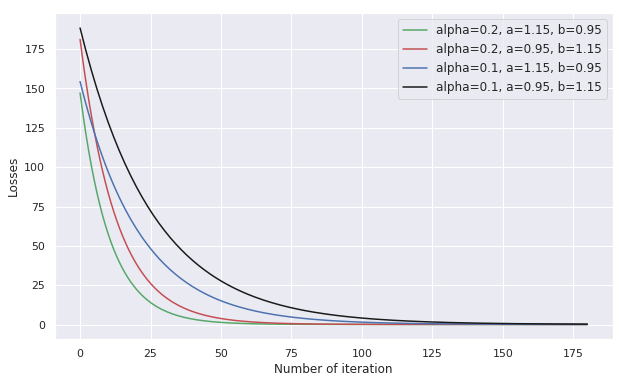

In [268]:
# **********  COMBINED PLOTS  **********

# LOSSES
min_iter = min(len(losses_exp31), len(losses_exp32), len(losses_exp33),
              len(losses_exp34), len(losses_exp35), len(losses_exp36))

plt.figure(figsize=(10,6))
plt.plot(range(min_iter), losses_exp31[:min_iter], 'g', label = 'alpha=0.2, a=1.15, b=0.95')
plt.plot(range(min_iter), losses_exp32[:min_iter], 'r', label = 'alpha=0.2, a=0.95, b=1.15')
plt.plot(range(min_iter), losses_exp33[:min_iter], 'b', label = 'alpha=0.1, a=1.15, b=0.95')
plt.plot(range(min_iter), losses_exp34[:min_iter], 'k', label = 'alpha=0.1, a=0.95, b=1.15')
#plt.plot(range(min_iter), losses_exp35[:min_iter], 'k-', label = 'alpha=0.2, a=20, b=15')
#plt.plot(range(min_iter), losses_exp36[:min_iter], 'k--', label = 'alpha=0.2, a=15, b=20')
plt.xlabel('Number of iteration')
plt.ylabel('Losses')
plt.legend(loc="best", fontsize = 12)
plt.show()



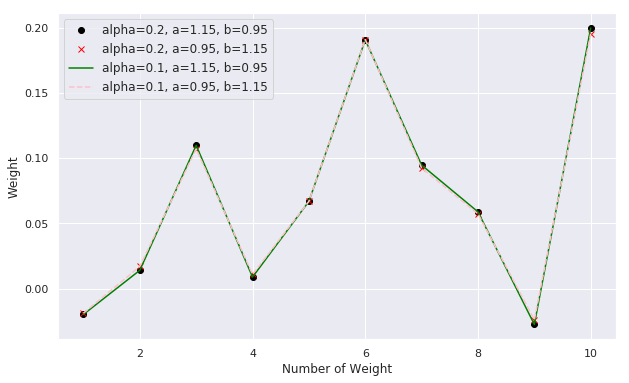

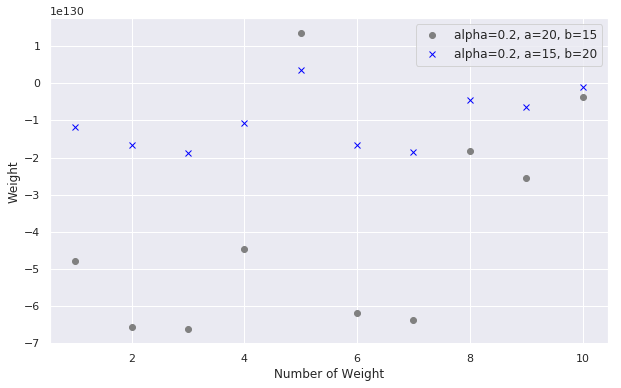

In [325]:
# WEIGHTS (# without bias w0.)

n1 = len(weights_exp31) - 1
n2 = len(weights_exp32) - 1
n3 = len(weights_exp33) - 1
n4 = len(weights_exp34) - 1
n5 = len(weights_exp35) - 1
n6 = len(weights_exp36) - 1

number_w = range(1, len(weights_exp31[1])) # without bias w0.

plt.figure(figsize=(10,6))
plt.plot(number_w, weights_exp31[n1][1:11], 'o', color = 'black', label = 'alpha=0.2, a=1.15, b=0.95')
plt.plot(number_w, weights_exp32[n2][1:11], 'x', color = 'red', label = 'alpha=0.2, a=0.95, b=1.15')
plt.plot(number_w, weights_exp33[n3][1:11], '-', color = 'green', label = 'alpha=0.1, a=1.15, b=0.95')
plt.plot(number_w, weights_exp34[n4][1:11], '--', color = 'pink', label = 'alpha=0.1, a=0.95, b=1.15')
plt.xlabel('Number of Weight')
plt.ylabel('Weight')
plt.legend(loc="best", fontsize = 12)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(number_w, weights_exp35[n5][1:11], 'o', color = 'grey', label = 'alpha=0.2, a=20, b=15')
plt.plot(number_w, weights_exp36[n6][1:11], 'x', color = 'blue', label = 'alpha=0.2, a=15, b=20')
plt.xlabel('Number of Weight')
plt.ylabel('Weight')
plt.legend(loc="best", fontsize = 12)
plt.show()


### Task 10. Discussion (1 point)
Answer following questions:
1. Have you managed to get sufficiently different weights with different $\alpha$ or $(a,b)$ parameters of assymetry? What does it mean?
2. Assume $a$ and $b$ are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume $a=1$ and choosing only $b$).

1. In converging models, the weights are the same. This means that the algorithm managed to achieve the minimum loss function at different alpha values.  
But if the algorithms did not converge with bad hyperparameters, then the weights of such algorithms were different.  
Experiments have also shown that the algorithm converges faster if $a > b$ (for different alphas).  

2. We can set a grid of values for different values (a, b), and configure them as hyperparameters of the model, i.e. train the model for all the given values $(a, b)$ and select the values $(a_i, b_i)$ that give the best convergence.  
We can also try using $(a, b)$ as model parameters and adding them to the vector of weights (to minimize the loss function for the extended vector of weights).
